In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Vistazo inicial

In [5]:
df = pd.read_csv('./datasets/Bakery Sales.csv');
df

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Primeramente podemos observar que hay una gran cantidad de nulos en el dataframe. Pero si le hechamos un vistazo más de cerca podemos interpretar que los nulos en determinadas columnas significa que no se realizó ninguna venta de ese producto.

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

In [478]:
df.describe()

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
count,2.420000e+03,1973.000000,857.000000,220.000000,412.000000,747.000000,193.000000,779.000000,323.000000,587.000000,...,196.000000,343.000000,90.000000,35.000000,519.000000,355.000000,209.000000,54.000000,7.0,47.000000
mean,2.117252e+04,1.636594,1.199533,1.131818,1.245146,1.404284,1.108808,1.213094,1.126935,1.236797,...,1.071429,1.148688,1.022222,1.085714,1.090559,1.340845,1.153110,1.018519,1.0,1.042553
std,2.699727e+04,1.115636,0.510268,0.433617,0.527216,1.027704,0.373016,0.797350,0.393249,0.601598,...,0.258199,0.499757,0.148231,0.373491,0.306757,0.614692,0.523948,0.136083,0.0,0.204030
min,1.280000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
25%,1.580000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
50%,1.850000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
75%,2.300000e+04,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.0,1.000000
max,1.293000e+06,11.000000,5.000000,5.000000,5.000000,16.000000,3.000000,14.000000,4.000000,6.000000,...,2.000000,5.000000,2.000000,3.000000,4.000000,6.000000,4.000000,2.000000,1.0,2.000000


# Nulos

## Rellenamos nulos

Como vimos antes hay 2 columnas las cuales son todo nulos, esas dos nos las cargaremos.

In [480]:
df.drop('croque monsieur', axis=1, inplace=True)
df.drop('mad garlic', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  milk tea            137 non-null    float64
 15  gateau chocolat     196 non-null    float64
 16  pandor

Ahora vamos a crear una lista con las columnas que tratan el número de artículos que se hicieron en un pedido.

In [481]:
items = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu', 'merinque cookies']

Y simplemente recorreremos los valores de esas columnas y cambiaremos los nulos por 0s.

In [482]:
for key in items:
  for i in range(len(df[key])):
    value = df[key].iloc[i]
    if np.isnan(value):
      df.loc[i, key] = 0

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           2654 non-null   float64
 5   plain bread         2654 non-null   float64
 6   jam                 2654 non-null   float64
 7   americano           2654 non-null   float64
 8   croissant           2654 non-null   float64
 9   caffe latte         2654 non-null   float64
 10  tiramisu croissant  2654 non-null   float64
 11  cacao deep          2654 non-null   float64
 12  pain au chocolat    2654 non-null   float64
 13  almond croissant    2654 non-null   float64
 14  milk tea            2654 non-null   float64
 15  gateau chocolat     2654 non-null   float64
 16  pandor

## Eliminamos nulos

Ahora eliminaremos las filas que contengan nulos.

In [484]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               2166 non-null   int64  
 1   datetime            2166 non-null   object 
 2   day of week         2166 non-null   object 
 3   total               2166 non-null   float64
 4   place               2166 non-null   object 
 5   angbutter           2166 non-null   float64
 6   plain bread         2166 non-null   float64
 7   jam                 2166 non-null   float64
 8   americano           2166 non-null   float64
 9   croissant           2166 non-null   float64
 10  caffe latte         2166 non-null   float64
 11  tiramisu croissant  2166 non-null   float64
 12  cacao deep          2166 non-null   float64
 13  pain au chocolat    2166 non-null   float64
 14  almond croissant    2166 non-null   float64
 15  milk tea            2166 non-null   float64
 16  gateau

# Agrupamos por día e lugar

Bien ahora que todos que tenemos el dataframe libre de nulos, vamos a agrupar las filas por día y lugar.

In [486]:
items += ['total']

Primero separaremos el valor de datetime entre la fecha y la hora, y nos quedaremos solo con la primera.

In [487]:
df['datetime'] = df['datetime'].apply(lambda x: x.split(' ')[0])

In [488]:
df.head(5)

,index,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,254,2019-08-12,Mon,24300.0,효자 3동,1.0,2.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,255,2019-08-12,Mon,15800.0,효자 3동,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,256,2019-08-12,Mon,14800.0,후평 1동,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,257,2019-08-12,Mon,16300.0,후평 1동,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,258,2019-08-12,Mon,18300.0,후평 2동,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora vamos a comprobar cuantos días tenemos duplicados.

In [489]:
df['datetime'].duplicated().sum()

1944

Ahora los agruparemos por los campos propiamente dichos.

In [490]:
results = df.groupby(['datetime', 'place']).agg({key:'sum' for key in items}).reset_index()

In [491]:
results.head(5)

,datetime,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,...,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,total
0,2019-08-12,석사동,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19100.0
1,2019-08-12,소양동,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26000.0
2,2019-08-12,효자 3동,2.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40100.0
3,2019-08-12,후평 1동,3.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,63200.0
4,2019-08-12,후평 2동,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18300.0


In [492]:
days = [];
for key in results['datetime']:
  day = df.loc[df['datetime'] == key].iloc[0]['day of week']
  days += [day]

In [493]:
results['day of week'] = days

In [494]:
results.head(5)

,datetime,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,...,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,total,day of week
0,2019-08-12,석사동,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19100.0,Mon
1,2019-08-12,소양동,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26000.0,Mon
2,2019-08-12,효자 3동,2.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40100.0,Mon
3,2019-08-12,후평 1동,3.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,63200.0,Mon
4,2019-08-12,후평 2동,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18300.0,Mon


Ahora simplemente cambiaremos el orden de las columnas, por pura estética.

In [495]:
df = results

In [496]:
orde = []

orde += [df.columns[0]]
orde += [df.columns[-1]]
orde += list(df.columns[1:-1])
orde

['datetime',
 'day of week',
 'place',
 'angbutter',
 'plain bread',
 'jam',
 'americano',
 'croissant',
 'caffe latte',
 'tiramisu croissant',
 'cacao deep',
 'pain au chocolat',
 'almond croissant',
 'milk tea',
 'gateau chocolat',
 'pandoro',
 'cheese cake',
 'lemon ade',
 'orange pound',
 'wiener',
 'vanila latte',
 'berry ade',
 'tiramisu',
 'merinque cookies',
 'total']

In [497]:
df = df[orde]

In [498]:
df.head(5)

,datetime,day of week,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,...,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,total
0,2019-08-12,Mon,석사동,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19100.0
1,2019-08-12,Mon,소양동,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26000.0
2,2019-08-12,Mon,효자 3동,2.0,2.0,0.0,0.0,3.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40100.0
3,2019-08-12,Mon,후평 1동,3.0,0.0,0.0,2.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,63200.0
4,2019-08-12,Mon,후평 2동,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18300.0


# Duplicados

Vamos a comparar si queda alguna fila duplicada.

In [499]:
df.duplicated().sum()

0

No tenemos ninguna, pero de ser necesario las eliminariamos con el siguiente codigo.

In [500]:
df.drop_duplicates(inplace=True)

# Tratamentos de categóricas

El dataframe está listo para analizarlo,, pero hay un problema no se coreano y estoy seguro de que vosotros tampoco, así que haremos una pequeña trampa y sustituiremos los nombres de los locales por nombres de ciudades gallegas.

In [501]:
df['place'].unique()

array(['석사동', '소양동', '효자 3동', '후평 1동', '후평 2동', '동면', '퇴계동', '후평 3동',
       '강남동', '신사우동', '효자 1동', '교동', '조운동', '약사명동', '효자 2동', '근화동', '동내면',
       '교동 ', '신동면'], dtype=object)

In [502]:
nomes = ["A Coruña", "Lugo", "Ourense", "Pontevedra", "Vigo",
                     "Santiago", "Ferrol", "Ponteareas", "Oleiros",
                     "Carballo", "Ribeira", "Narón", "Redondela", "Vilagarcía",
                     "Culleredo", "Arteijo", "Cambre", "Vilalba", "Betanzos"]

In [503]:
places = {df['place'].unique()[i]:nomes[i] for i in range(len(df['place'].unique()))}
places

{'석사동': 'A Coruña',
 '소양동': 'Lugo',
 '효자 3동': 'Ourense',
 '후평 1동': 'Pontevedra',
 '후평 2동': 'Vigo',
 '동면': 'Santiago',
 '퇴계동': 'Ferrol',
 '후평 3동': 'Ponteareas',
 '강남동': 'Oleiros',
 '신사우동': 'Carballo',
 '효자 1동': 'Ribeira',
 '교동': 'Narón',
 '조운동': 'Redondela',
 '약사명동': 'Vilagarcía',
 '효자 2동': 'Culleredo',
 '근화동': 'Arteijo',
 '동내면': 'Cambre',
 '교동 ': 'Vilalba',
 '신동면': 'Betanzos'}

In [504]:
df['place'] = list(df['place'].map(places))

In [505]:
df.head(5)

,datetime,day of week,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,...,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,total
0,2019-08-12,Mon,A Coruña,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19100.0
1,2019-08-12,Mon,Lugo,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26000.0
2,2019-08-12,Mon,Ourense,2.0,2.0,0.0,0.0,3.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40100.0
3,2019-08-12,Mon,Pontevedra,3.0,0.0,0.0,2.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,63200.0
4,2019-08-12,Mon,Vigo,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18300.0


# Exportación do Dataframe limpo

In [506]:
df.to_csv('bakery_cleaned.csv', index=False);

# Separación de categoricas y numéricas

In [507]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['datetime', 'day of week', 'place']
Variables numéricas: ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu', 'merinque cookies', 'total']


In [508]:
df_cat = df[cats]
df_num = df[nums]

# Análise dos datos categóricos

# Análise da distribución

## Análise dos lugares

Echemosle un vistazo a la distribución de lugares.

<Axes: xlabel='place', ylabel='count'>

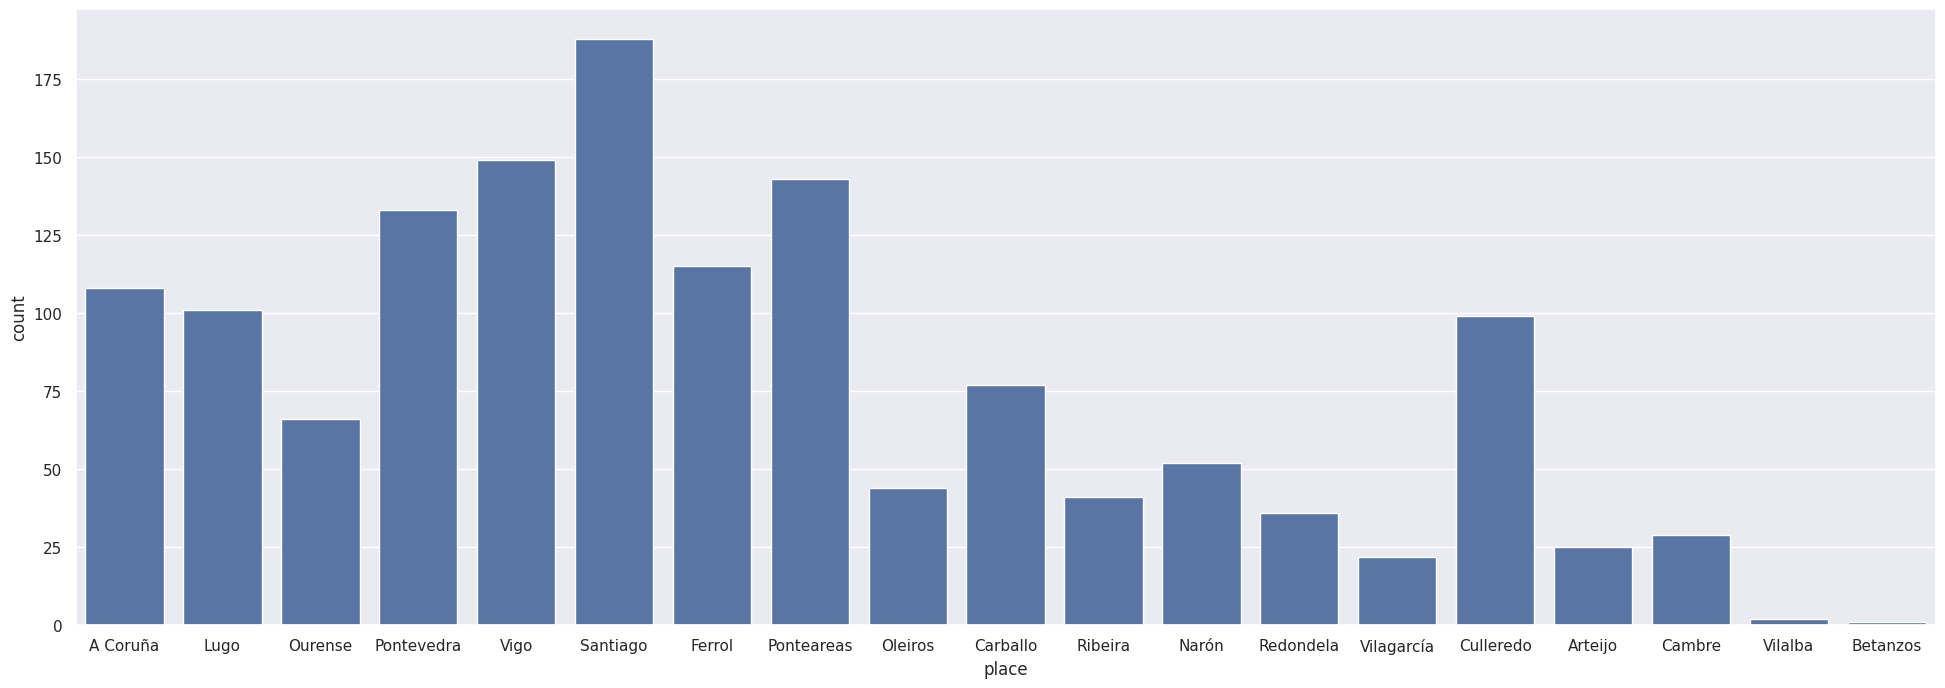

In [509]:
fig = plt.figure(1, (24, 8))
sns.set_theme(style='darkgrid')

# Distribución de "orixe"
sns.countplot(data=df_cat,x='place')

En esta gráfica podemos ver que locales han raliazo más pedidos, por ejemplo, el Santiago Coreano es el que más pedidoas ha hecho mientras que betanzos el que menos, como la vida misma.

## Análise da cronoloxía

Ahora veremos las distribución de todos los pedidos a lo largo del tiempo.

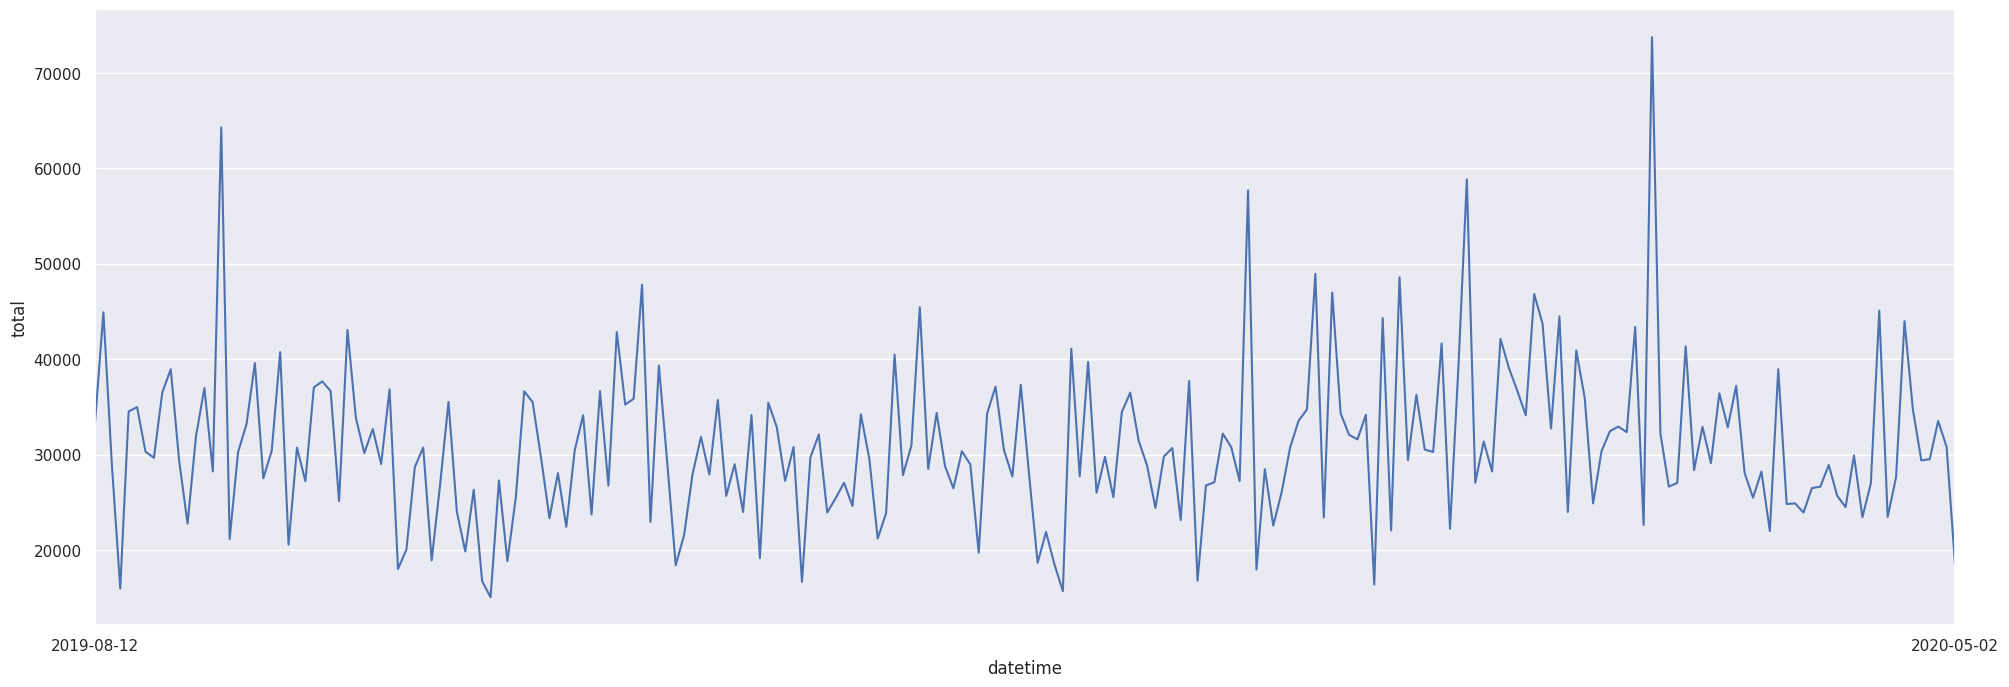

In [510]:
df_ = df.sort_values(by='datetime')

fig = plt.figure(1, (24, 8))
sns.set_theme(style='darkgrid')

# Distribución de "orixe"
sns.lineplot(data=df_, x='datetime', y='total', errorbar=None)

min_value = df_['datetime'].min()
max_value = df_['datetime'].max()

# Establece los límites del eje x
plt.xlim(min_value, max_value)

plt.xticks([min_value, max_value])  # Esto desactiva las etiquetas del eje x
plt.show()

Podemos ver que salvo en días concretos, de los que podemos interpretar que quizá fuesen festivos o algo por el estilo, la venta es muy irregular pasando de que en un día a otro se haya duplicado el ingreso total.

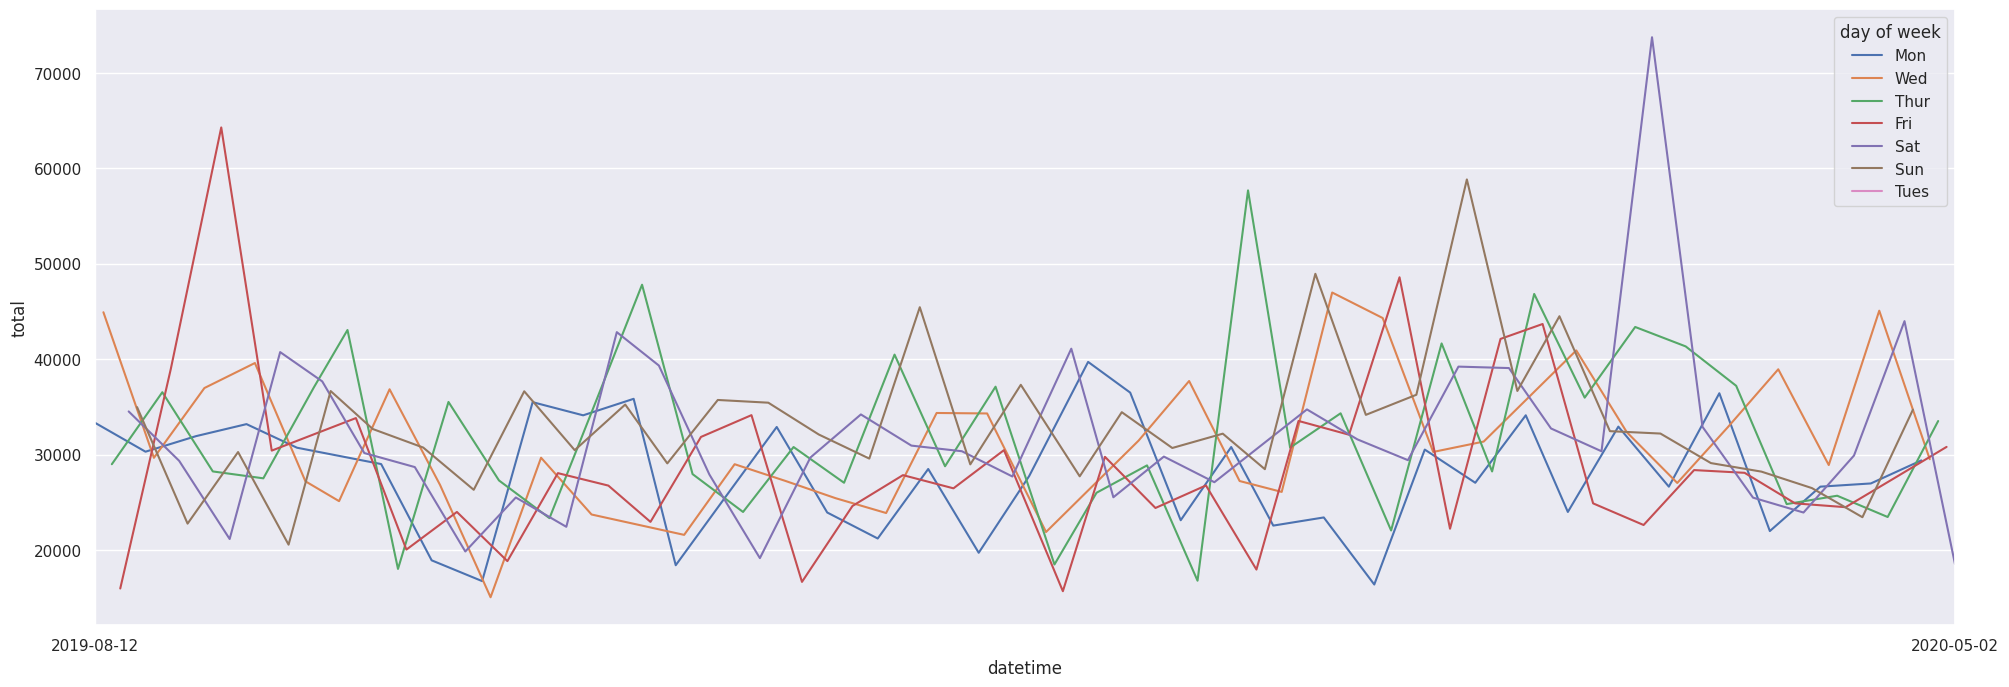

In [511]:
df_ = df.sort_values(by='datetime')

fig = plt.figure(1, (24, 8))
sns.set_theme(style='darkgrid')

# Distribución de "orixe"
sns.lineplot(data=df_, x='datetime', y='total', hue='day of week', errorbar=None)

min_value = df_['datetime'].min()
max_value = df_['datetime'].max()

# Establece los límites del eje x
plt.xlim(min_value, max_value)

plt.xticks([min_value, max_value])  # Esto desactiva las etiquetas del eje x
plt.show()

Ahora diviremos la gráfica anterior en los días de la semana, y podemos apreciar que aunque no la que más ingresos ha generado, el día más constante de en cuanto a sus ingresos son los Sábados.

## Análise dos días da semana

Y vamos a continuar enfocandonos en los días de la semana, hemos visto que el Sábado es el día que más ingresos se suele haber,

<Axes: xlabel='day of week', ylabel='count'>

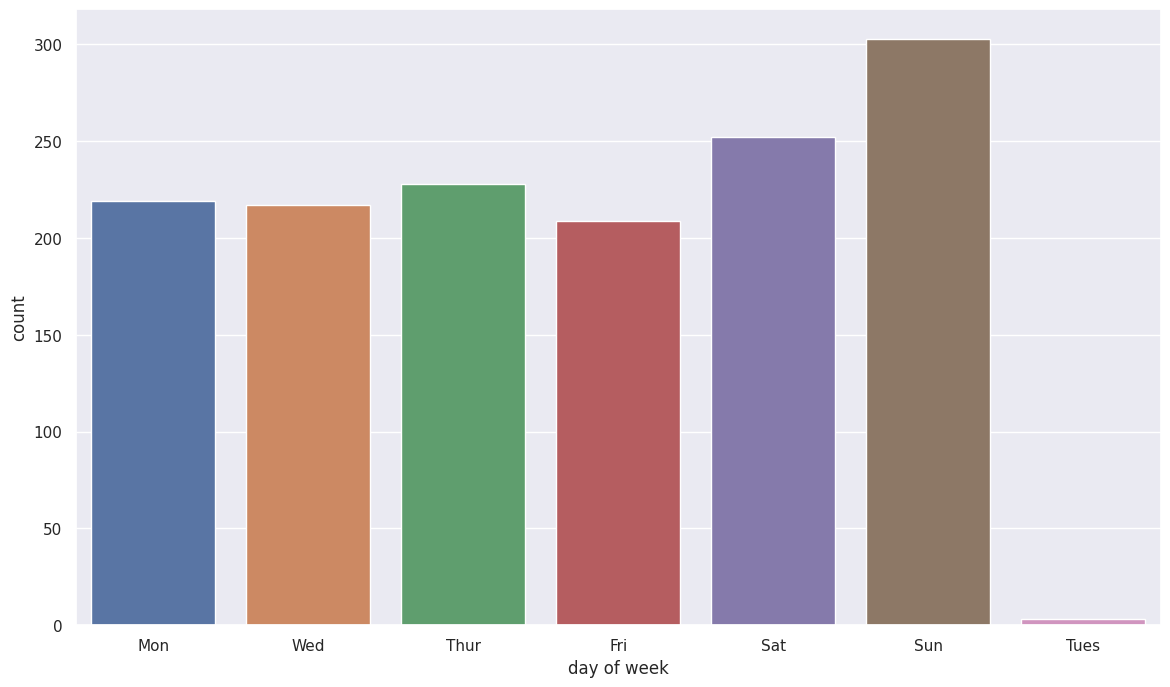

In [512]:
fig = plt.figure(1, (14, 8))
sns.set_theme(style='darkgrid')

# Distribución de "orixe"
sns.countplot(data=df_cat,x='day of week', hue='day of week')

En esta gráfica podemos comprobar que los Sábados suelen realizarse más pedidos. Pero y si hablamos de ingresos?

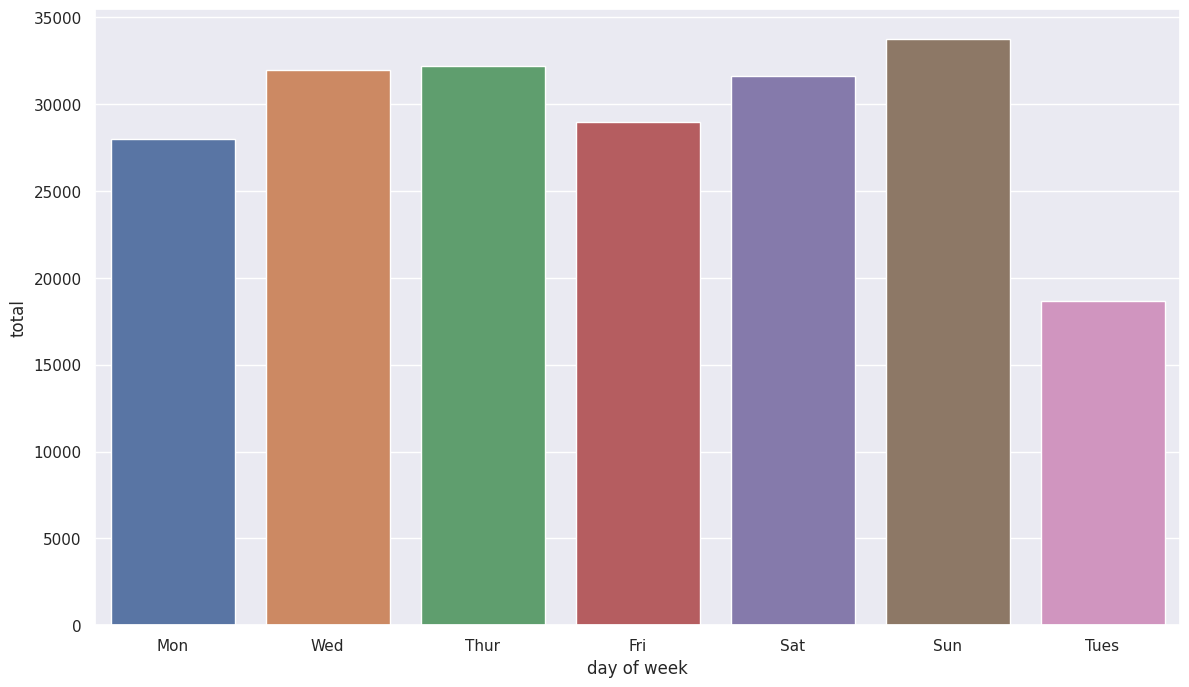

In [513]:
df_ = df.sort_values(by='datetime')

fig = plt.figure(1, (14, 8))
sns.set_theme(style='darkgrid')

# Distribución de "orixe"
sns.barplot(data=df_, x='day of week', y='total', hue='day of week', errorbar=None)

plt.show()

Pues a pesar de que los Sábados se vende mucho más, y se genera tambien más, sorprende que en el resto de días el ingreso medio no varia mucho.

Pero y que pasa con los Martes, hemos visto que el número de pedidos que se han hecho en Martes son tan ínfimos que casi no salen representados en el gráfico, y a la hora de comprar la media de ingresos, estos tienen la mitad.

Primero comprobaremos cuantos pedidos se han realizado en Martes.

In [514]:
df[df['day of week'] == 'Tues']['day of week'].count()

3

3 pedidos, curioso.

Quiere decir esto que de todos los Martes del año, solo se han hecho 3 pedidos en total. Vamos a comprobar si esos pedidos se realizaron el mismo día.

In [515]:
df[df['day of week'] == 'Tues']['datetime'].unique()

array(['2019-12-24'], dtype=object)

Efectivamente, solo hubo un Martes que se realizaran pedidos, por lo que podemos suponer que se trataba de un día especial y que probablemente este negocio descansara los Martes.

In [516]:
for key in df['day of week'].unique():
  mean = df[df['day of week'] == key]['total'].mean();
  print(f'Media de ventas totales de {key}:\t{mean}');

Media de ventas totales de Mon:	27998.173515981736
Media de ventas totales de Wed:	31953.917050691245
Media de ventas totales de Thur:	32177.19298245614
Media de ventas totales de Fri:	28944.019138755983
Media de ventas totales de Sat:	31633.333333333332
Media de ventas totales de Sun:	33773.267326732675
Media de ventas totales de Tues:	18666.666666666668


<Axes: xlabel='total', ylabel='day of week'>

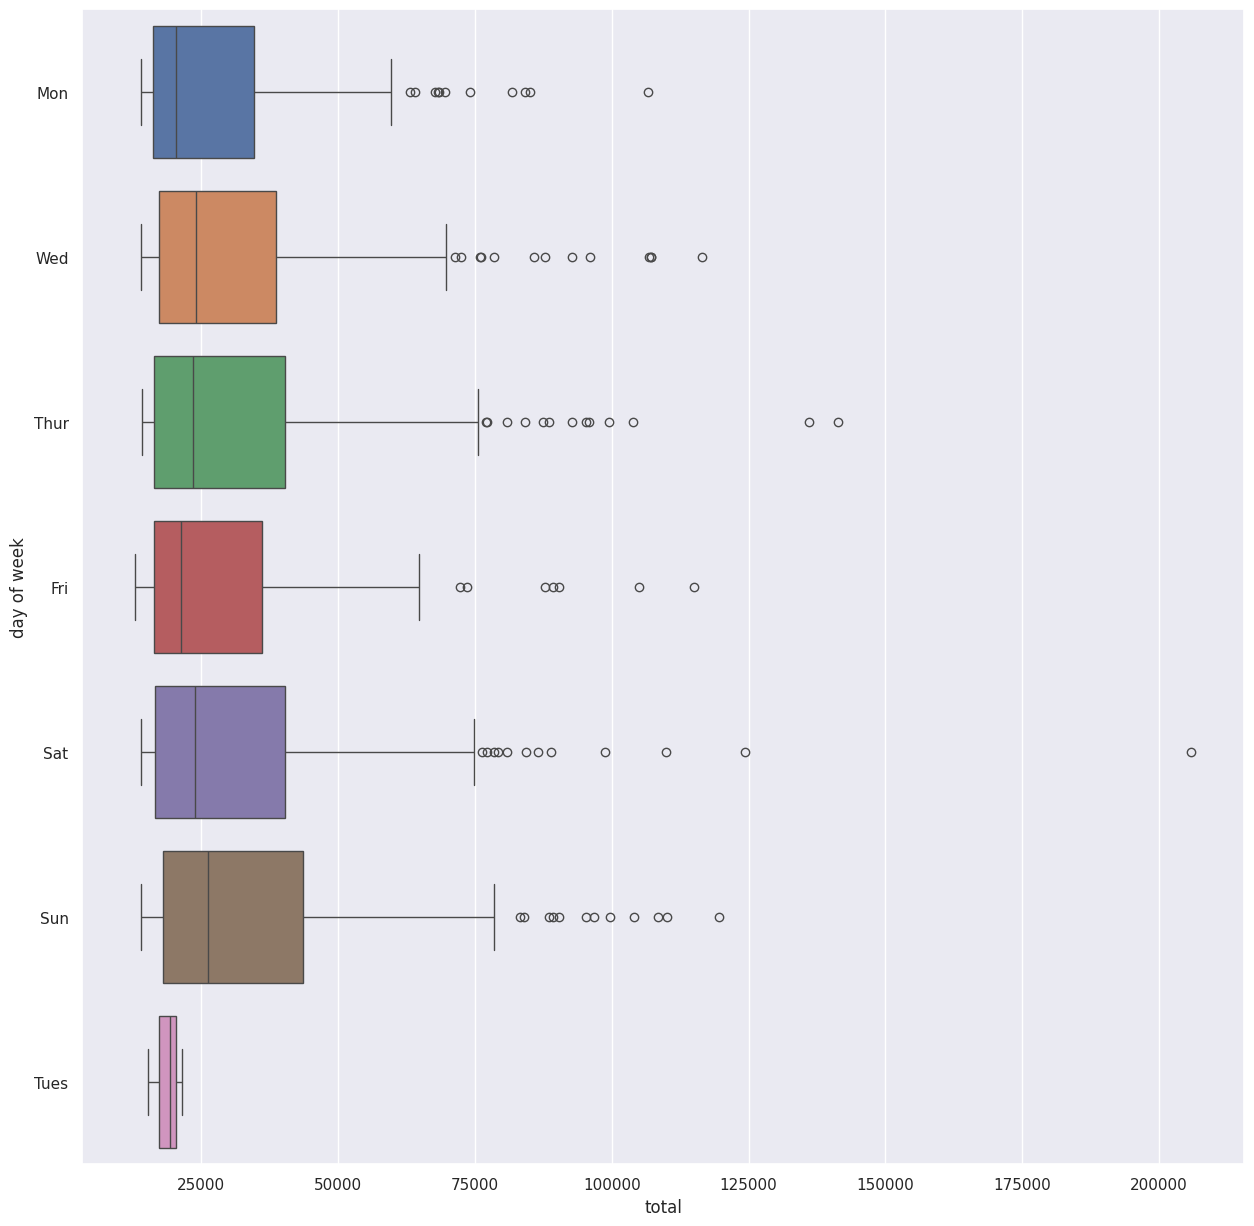

In [517]:
fig = plt.figure(1, (15, 15))
sns.set_theme(style='darkgrid')

sns.boxplot(data=df, y="day of week", x="total", hue='day of week')

## Prices

Y sobre los precios? no sabemos nada del precio de los productos, eso es porque estos vienen en otro csv.

In [6]:
prices = pd.read_csv('./datasets/Bakery price.csv');

In [518]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   price   22 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


In [519]:
prices

,Name,price
0,angbutter,4800
1,plain bread,3500
2,jam,1500
3,ice coffe,4000
4,croissant,3500
5,ice coffe latter,4500
6,tiramisu croissant,4800
7,cacao deep,4000
8,pain au chocolat,3500
9,almond croissant,4000


In [530]:
prices = prices[prices['Name'] != 'delivery fee']
prices = prices[prices['Name'] != 'croque monsieur']
prices = prices[prices['Name'] != 'mad garlic']
prices['Name'] = items[:-1];

In [531]:
prices['price'] = prices['price'].astype(float)

In [532]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    21 non-null     object 
 1   price   21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


<Axes: xlabel='Name', ylabel='price'>

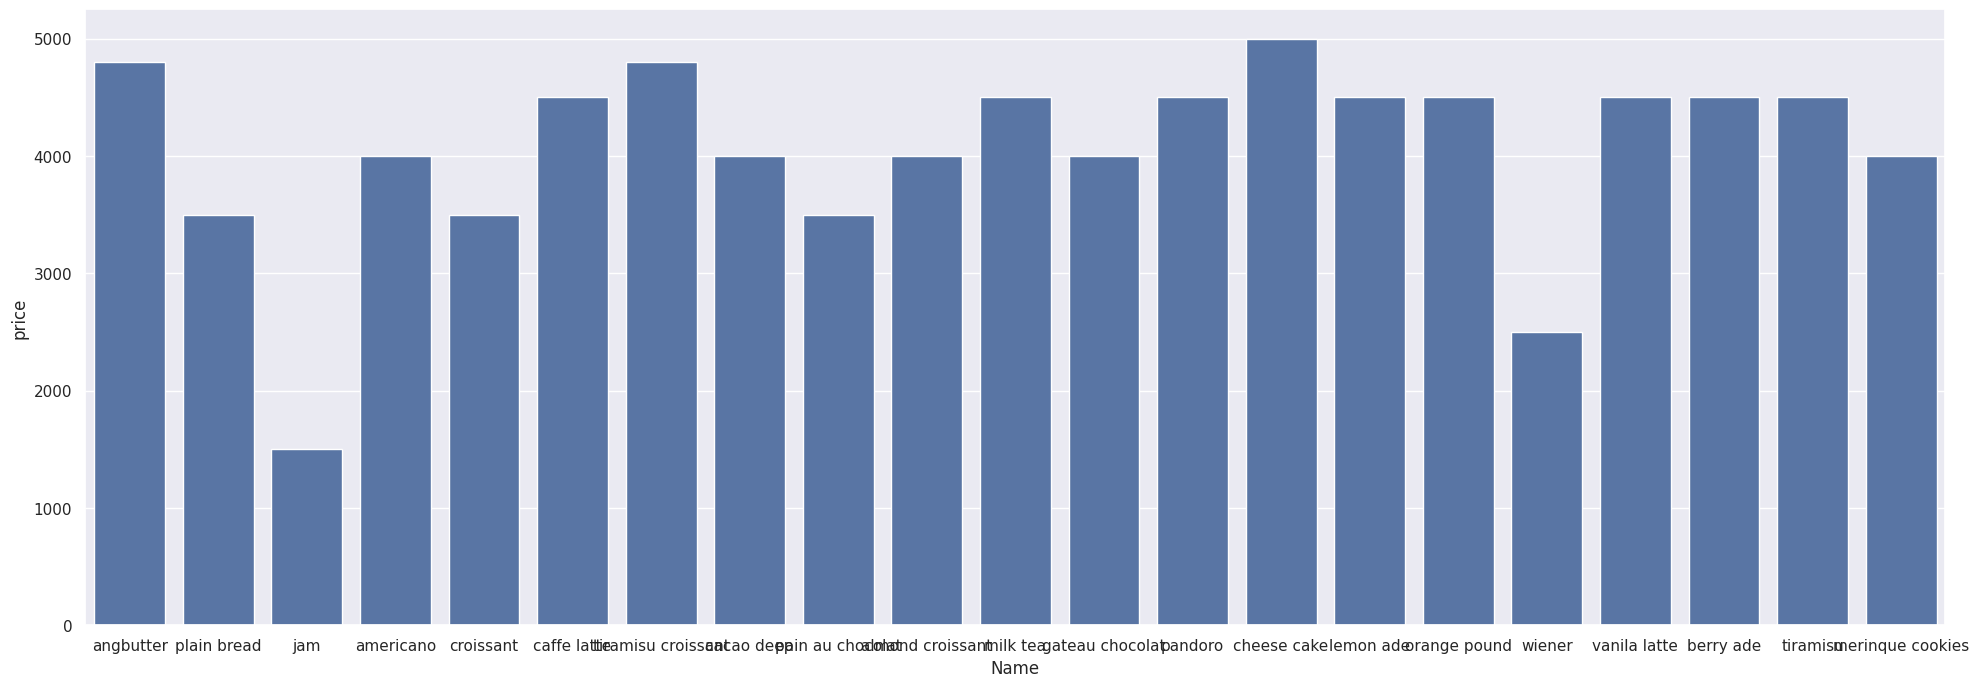

In [547]:
fig = plt.figure(1, (24, 8))
sns.set_theme(style='darkgrid')

# Distribución de "orixe"
sns.barplot(data=prices,y='price', x='Name')

En este gráfico podemos ver el precio de todos los productos, pero esto no nos esclarece nada sobre que producto se vende más y cual genera más ingresos.

Para ello primero tendremos que consultar en el dataframe anterior el número total de unidades de un producto vendidas y despues multiplicar ese número por su precio.

In [537]:
sells = [];

for i in prices.values:
  name, price = i[0], i[1];
  unit = df[name].sum()
  sells += [unit]

prices['sells per unit'] = sells;

In [540]:
total = [prices.iloc[i]['price'] * prices.iloc[i]['sells per unit'] for i in range(len(prices))]

In [542]:
prices['total'] = total

Y ya tenemos el dataframe listo.

In [543]:
prices.head()

,Name,price,sells per unit,total
0,angbutter,4800.0,2861.0,13732800.0
1,plain bread,3500.0,943.0,3300500.0
2,jam,1500.0,224.0,336000.0
3,americano,4000.0,476.0,1904000.0
4,croissant,3500.0,912.0,3192000.0


<Axes: xlabel='Name', ylabel='sells per unit'>

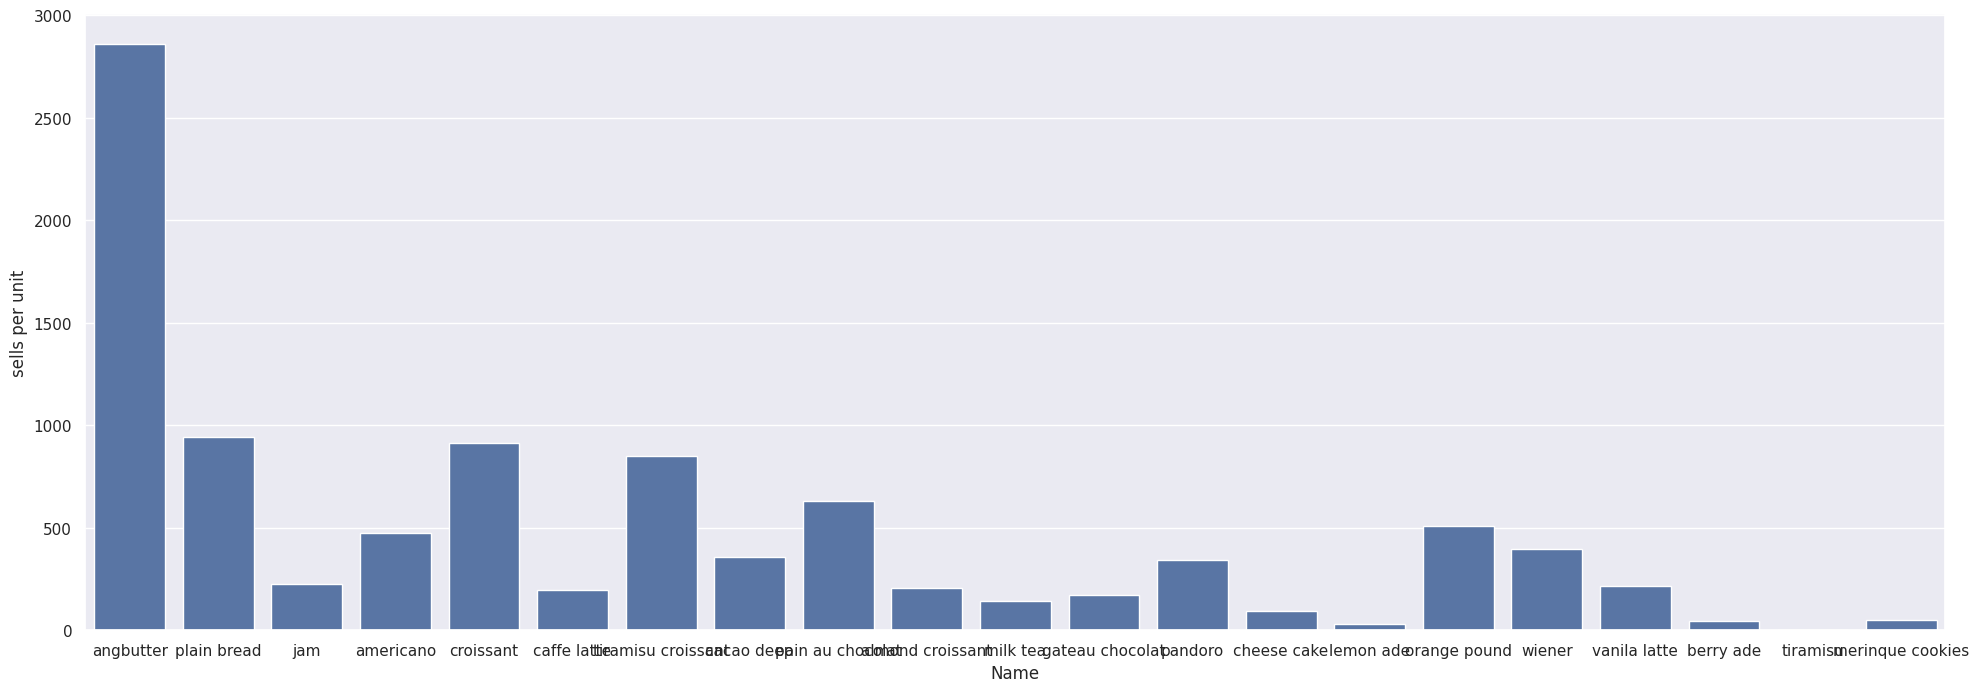

In [545]:
fig = plt.figure(1, (24, 8))
sns.set_theme(style='darkgrid')

# Distribución de "orixe"
sns.barplot(data=prices,x='Name', y='sells per unit')

En este gráfico podemos comprobar que el "angbutter" es el producto que más se vende con diferencia.

<Axes: xlabel='Name', ylabel='total'>

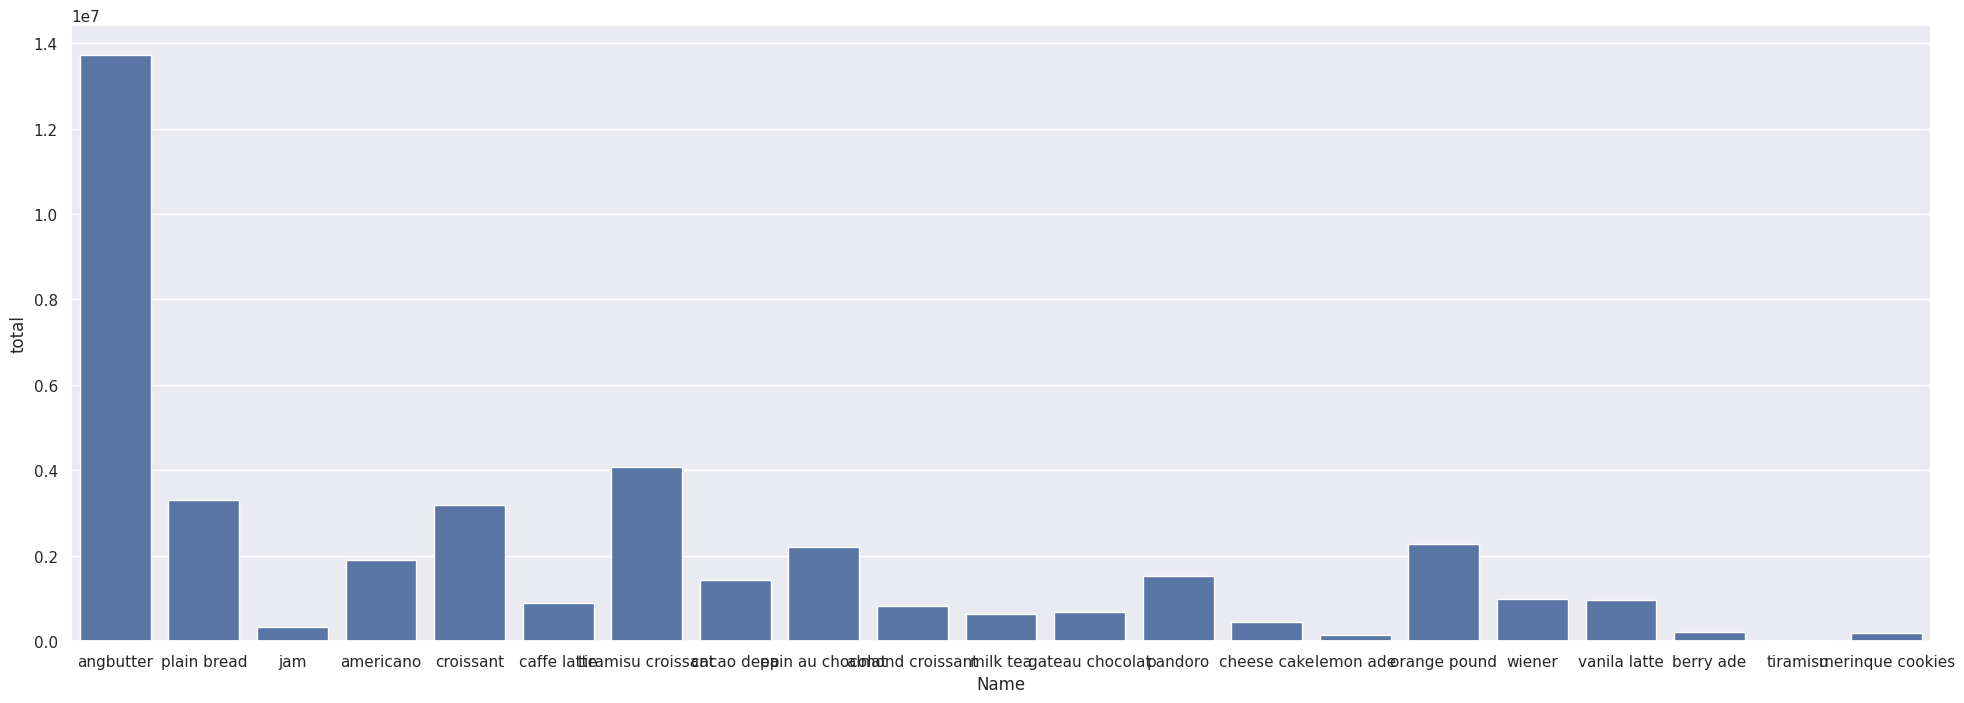

In [544]:
fig = plt.figure(1, (24, 8))
sns.set_theme(style='darkgrid')

# Distribución de "orixe"
sns.barplot(data=prices,x='Name', y='total')

Y en este gráfico comprobamos que tambien el "angbutter" es el producto que más ingresos aporta.

Pero lo más importante y que más intriga me causa, que producto es el "angbutter" y porque parece que en Corea sea consumido casi diariamente y que genere tanto. Con un simple vistazo podemos comprobar que vende muchisimo más que cualquier tipo de café, el cual el una bebida que se consume alrededor de todo el mundo.

Pues el "angbutter" se trata de lo siguiente:

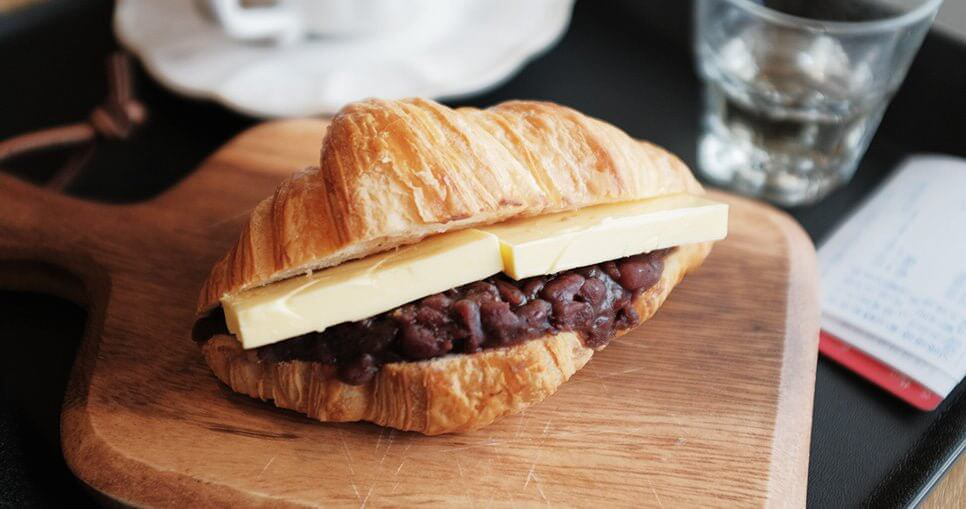

In [40]:
imagen = Image.open('angbuter.jpg')
imagen.show()

Un cacho de pan con mantequilla y frijoles rojos, en mi opinión, una porquería.